In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# 读取数据
data = pd.read_csv('sales_data.csv')

In [17]:
# 数据清洗
# 处理缺失值
print("缺失值情况：")
print(data.isnull().sum())
data.fillna(0, inplace=True)

缺失值情况：
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


In [18]:
# 处理重复值
duplicate_rows = data.duplicated()
print("\n重复值数量:", duplicate_rows.sum())
data = data.drop_duplicates()


重复值数量: 0


In [19]:
# 处理异常值（以Purchase列为例，使用IQR方法）
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Purchase'] >= lower_bound) & (data['Purchase'] <= upper_bound)]

In [20]:
# 描述性统计
numerical_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("\n数值型变量描述性统计：")
print(data[numerical_columns].describe())

print("\n类别型变量描述性统计：")
print(data[categorical_columns].describe())


数值型变量描述性统计：
            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.349120e+05  534912.000000   534912.000000       534912.000000   
mean   1.002991e+06       8.080673        0.408624            5.268983   
std    1.714130e+03       6.523152        0.491580            3.739120   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001495e+06       2.000000        0.000000            1.000000   
50%    1.003031e+06       7.000000        0.000000            5.000000   
75%    1.004416e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       534912.000000       534912.000000  534912.000000  
mean             6.758013            3.872235    9264.683312  
std              6.203385            6.263190    4895.538823  
min              0.000000            0.000000     185.000000  
25%  

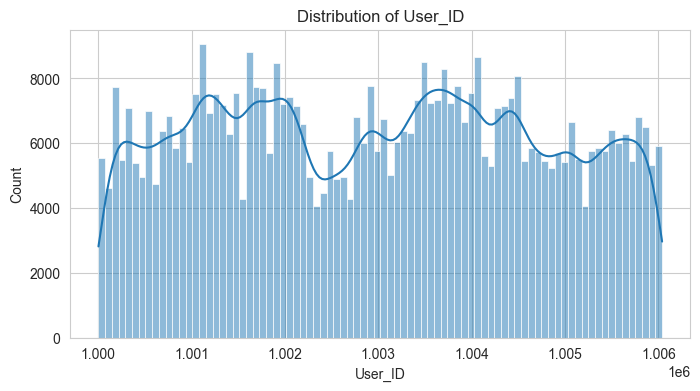

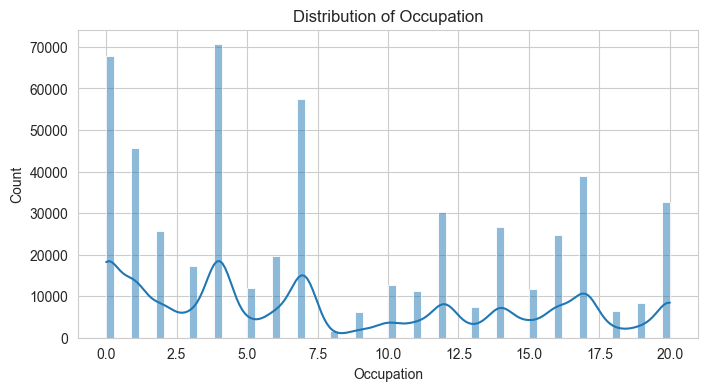

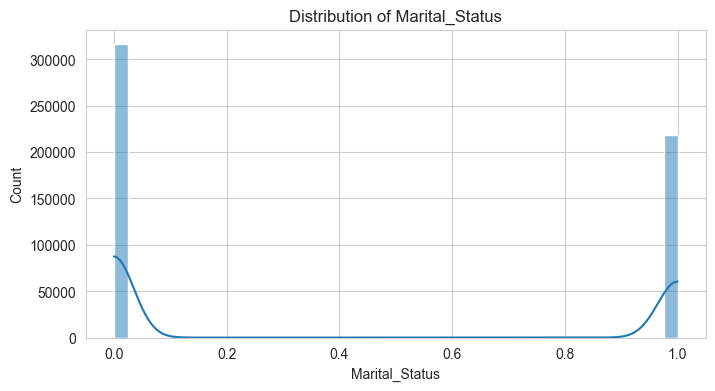

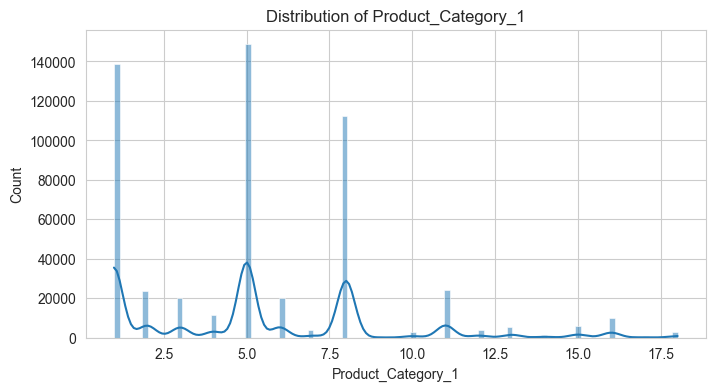

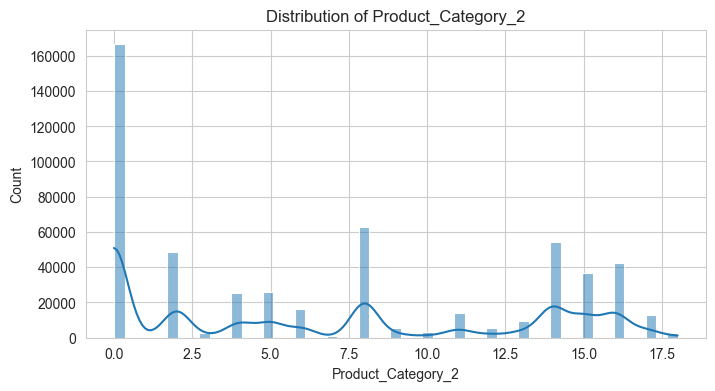

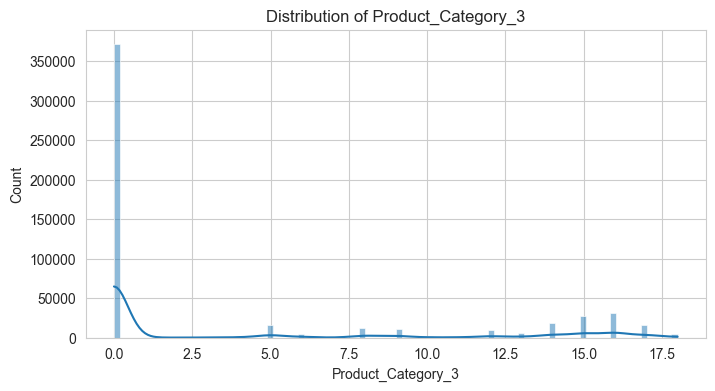

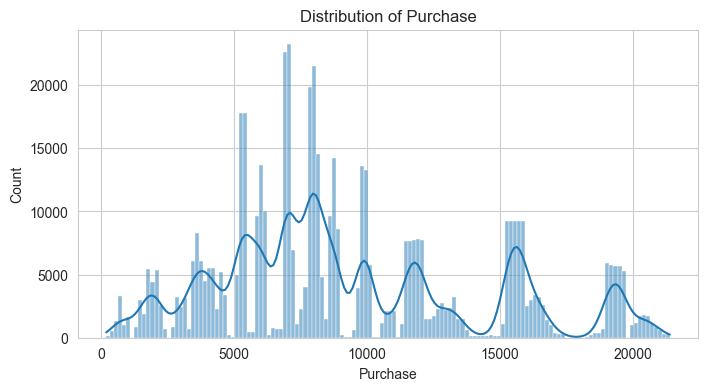

In [21]:
# 可视化
# 数值型变量分布
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

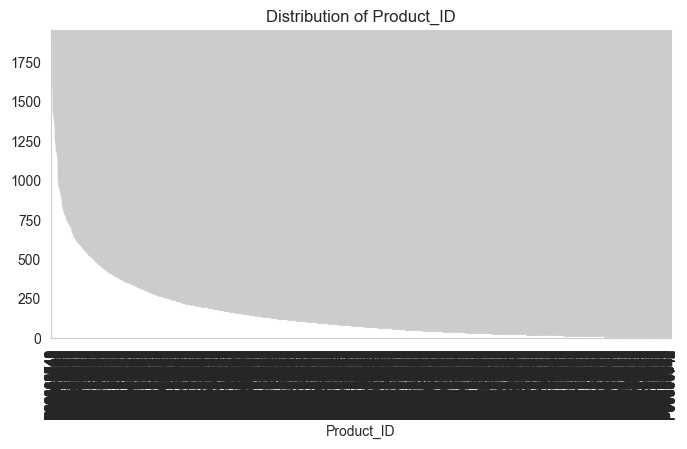

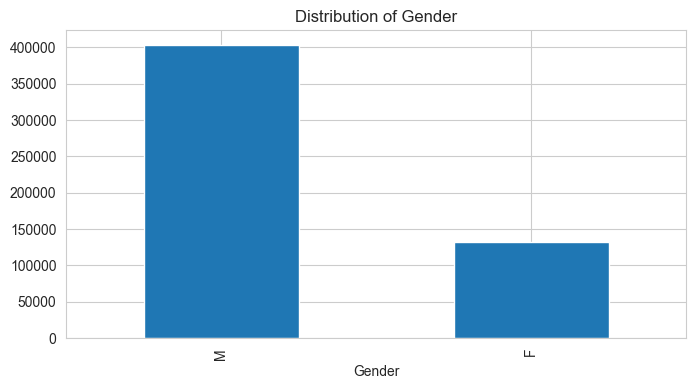

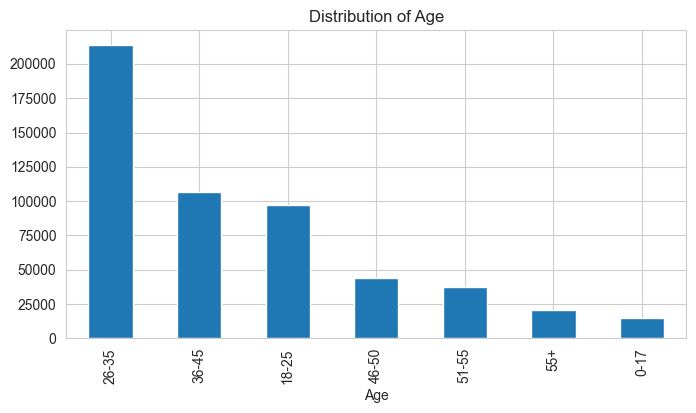

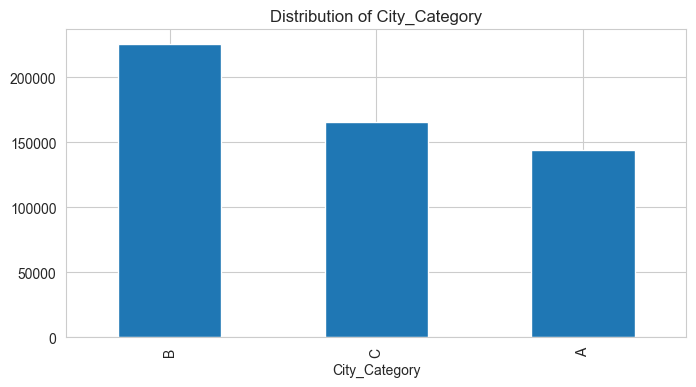

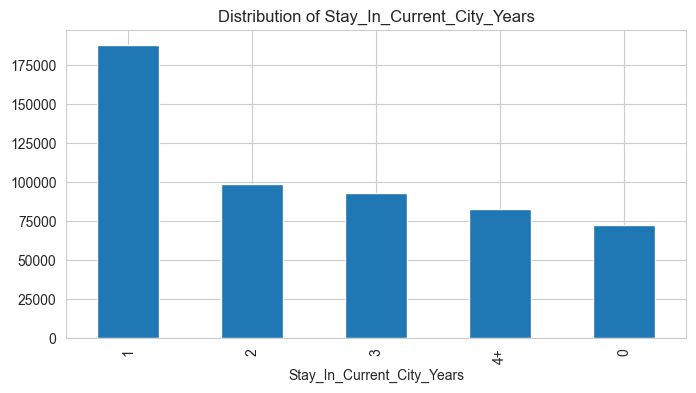

In [22]:
# 类别型变量分布
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

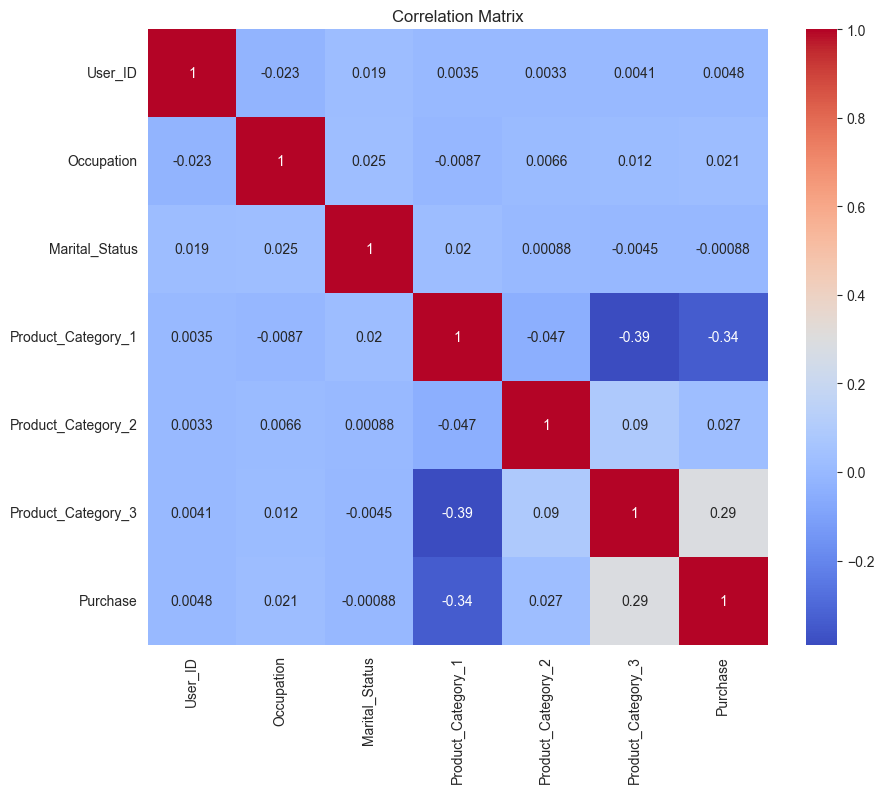

In [23]:
# 相关性分析
correlation = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [24]:
# 特征提取与转换
# 类别编码
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data[numerical_columns], encoded_df], axis=1)

In [25]:
# 标准化
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
  data['date'] = pd.to_datetime(data['date_column'])
data.set_index('date', inplace=True)
data.resample('M').mean().plot()
plt.show()  #%%
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# 读取数据
data = pd.read_csv('sales_data.csv')

In [ ]:
# 数据清洗
# 处理缺失值
print("缺失值情况：")
print(data.isnull().sum())
data.fillna(0, inplace=True)

In [ ]:
# 处理重复值
duplicate_rows = data.duplicated()
print("\n重复值数量:", duplicate_rows.sum())
data = data.drop_duplicates()

In [ ]:
# 处理异常值（以Purchase列为例，使用IQR方法）
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Purchase'] >= lower_bound) & (data['Purchase'] <= upper_bound)]

In [ ]:
# 描述性统计
numerical_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("\n数值型变量描述性统计：")
print(data[numerical_columns].describe())

print("\n类别型变量描述性统计：")
print(data[categorical_columns].describe())

In [ ]:
# 可视化
# 数值型变量分布
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# 类别型变量分布
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# 相关性分析
correlation = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 特征提取与转换
# 类别编码
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data[numerical_columns], encoded_df], axis=1)

In [ ]:
# 标准化
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
  data['date'] = pd.to_datetime(data['date_column'])
data.set_index('date', inplace=True)
data.resample('M').mean().plot()
plt.show()#%%
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# 读取数据
data = pd.read_csv('sales_data.csv')

In [ ]:
# 数据清洗
# 处理缺失值
print("缺失值情况：")
print(data.isnull().sum())
data.fillna(0, inplace=True)

In [ ]:
# 处理重复值
duplicate_rows = data.duplicated()
print("\n重复值数量:", duplicate_rows.sum())
data = data.drop_duplicates()

In [ ]:
# 处理异常值（以Purchase列为例，使用IQR方法）
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Purchase'] >= lower_bound) & (data['Purchase'] <= upper_bound)]

In [ ]:
# 描述性统计
numerical_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("\n数值型变量描述性统计：")
print(data[numerical_columns].describe())

print("\n类别型变量描述性统计：")
print(data[categorical_columns].describe())

In [ ]:
# 可视化
# 数值型变量分布
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# 类别型变量分布
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# 相关性分析
correlation = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 特征提取与转换
# 类别编码
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data[numerical_columns], encoded_df], axis=1)

In [ ]:
# 标准化
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
  data['date'] = pd.to_datetime(data['date_column'])
data.set_index('date', inplace=True)
data.resample('M').mean().plot()
plt.show()  #%%
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# 读取数据
data = pd.read_csv('sales_data.csv')

In [ ]:
# 数据清洗
# 处理缺失值
print("缺失值情况：")
print(data.isnull().sum())
data.fillna(0, inplace=True)

In [ ]:
# 处理重复值
duplicate_rows = data.duplicated()
print("\n重复值数量:", duplicate_rows.sum())
data = data.drop_duplicates()

In [ ]:
# 处理异常值（以Purchase列为例，使用IQR方法）
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Purchase'] >= lower_bound) & (data['Purchase'] <= upper_bound)]

In [ ]:
# 描述性统计
numerical_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("\n数值型变量描述性统计：")
print(data[numerical_columns].describe())

print("\n类别型变量描述性统计：")
print(data[categorical_columns].describe())

In [ ]:
# 可视化
# 数值型变量分布
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# 类别型变量分布
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# 相关性分析
correlation = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 特征提取与转换
# 类别编码
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data[numerical_columns], encoded_df], axis=1)

In [ ]:
# 标准化
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [27]:
data['date'] = pd.to_datetime(data['date_column'])
data.set_index('date', inplace=True)
data.resample('M').mean().plot()
plt.show()


KeyError: 'date_column'